In [1]:
import pandas as pd
import numpy as np



df_lampara_muestra = pd.read_csv("LamparaMuestra.csv", skiprows=33, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_lampara_no_muestra = pd.read_csv("lampara_no_muestra.csv", skiprows=33, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_no_lampara_no_muestra = pd.read_csv("no_lampara_no_muestra.csv", skiprows=33, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_referencia = pd.read_csv("ThorBB2000.csv", skiprows=70, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_lampara_muestra.iloc[:-1,0].values, dtype=float)
radiancia_lampara_muestra = df_lampara_muestra.iloc[:-1,1].values
radiancia_lampara_no_muestra = df_lampara_no_muestra.iloc[:-1,1].values
radiancia_no_lampara_no_muestra = df_no_lampara_no_muestra.iloc[:-1,1].values
radiancia_referencia = df_referencia.iloc[:-1,1].values


irradiancia_lampara = np.array(radiancia_referencia * (radiancia_lampara_muestra - radiancia_no_lampara_no_muestra) / (radiancia_lampara_no_muestra - radiancia_no_lampara_no_muestra))

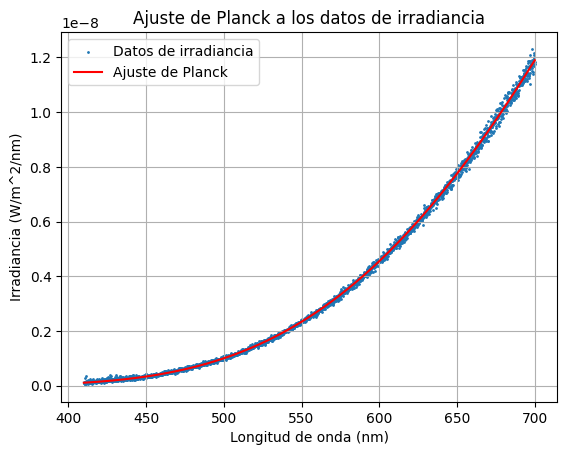

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import h, c

def planck(wavelength, a, b):
    return a / ((wavelength**5) * (np.exp(b / wavelength) - 1))

mask = (longitud_onda > 410) & (longitud_onda < 700)

popt, pcov = curve_fit(planck, longitud_onda[mask], irradiancia_lampara[mask], p0 = [1,1])
a, b = popt



plt.scatter(longitud_onda[mask], irradiancia_lampara[mask], s=1, label='Datos de irradiancia')
plt.plot(longitud_onda[mask], planck(longitud_onda[mask], *popt), label='Ajuste de Planck',c='red')

plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Irradiancia (W/m^2/nm)')
plt.title('Ajuste de Planck a los datos de irradiancia')
plt.legend()
plt.grid()
plt.show()

$$b = \frac{h c *10^9}{k T}$$
$$T = \frac{h c *10^9}{k b}$$

In [3]:
from scipy.constants import h, c, k
temperatura = 1e9 * h * c / (b * k)
print(temperatura)

1978.8794152379705


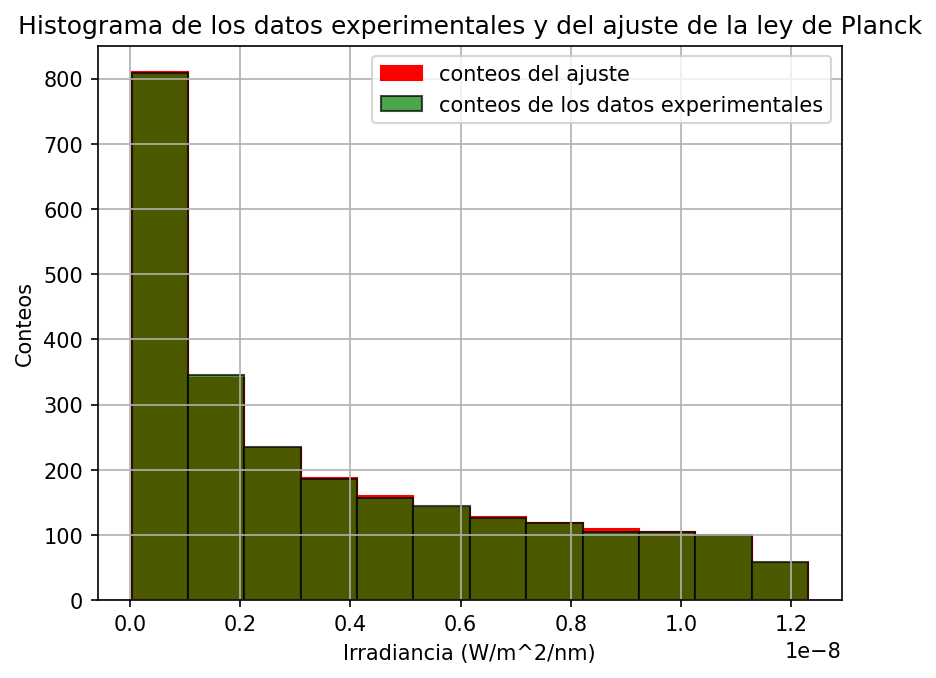

Chi cuadrado = 0.4031692954137962
Valor crítico de chi2 para 9 grados de libertad y alpha=0.05: 16.92
No se rechaza la hipótesis nula; por tanto, estadísticamente no hay nada que sugiera que los datos no sigan la ley de Planck.


In [17]:
import numpy as np
from scipy.stats import chi2


#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges, sabiendo que hay dos ligaduras en el ajuste (a y b)
nbin=int(1+3.322*np.log10(len(longitud_onda[mask])))

#Definimos un rango minimo y maximo comun para los datos obtenidos experimentamente y por medio del ajuste
# y datos experimentales de la variable dependiente

y = irradiancia_lampara[mask]
ymin1= min(y)

# yaj es el ajuste hecho por curve_fit para que los datos experimentales ajusten a la ley de planck
yaj = planck(longitud_onda[mask], *popt)
ymin2=min(yaj)
if ymin1>ymin2:
    ymin=ymin2
else:
    ymin=ymin1

ymax1=max(y)
ymax2=max(yaj)
if ymax1>ymax2:
    ymax=ymax1
else:
    ymax=ymax2
#Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.
plt.figure(dpi=150)
[naj,baj,paj]=plt.hist(yaj,nbin,range=(ymin,ymax), color = 'red', edgecolor = 'red', label='conteos del ajuste')
[n,b,p]=plt.hist(y,nbin,range=(ymin,ymax), color = 'green', alpha = 0.7, edgecolor = 'black', label='conteos de los datos experimentales')
for i in range(len(n)):
    if (n[i]<5) or naj[i]<5:
        print('El conteo del bin ', i+1, ' es menor a 5, por lo que no se puede usar el test chi cuadrado')

plt.xlabel('Irradiancia (W/m^2/nm)')
plt.ylabel('Conteos')
plt.title('Histograma de los datos experimentales y del ajuste de la ley de Planck')
plt.legend()
plt.grid()
plt.show()
def chi_sqr(dathistexp,dathistaj):
    return sum(((dathistexp-dathistaj)**2)/(dathistaj))

chi = chi_sqr(n, naj)
print('Chi cuadrado =',chi_sqr(n,naj))

df = nbin - 3 # Restamos 3 por los dos parámetros del ajuste y el número de intervalos
alpha = 0.05  # Nivel de significancia

chi2_critico = chi2.ppf(1-alpha, df)

print(f"Valor crítico de chi2 para {df} grados de libertad y alpha={alpha}: {chi2_critico:.2f}")
if chi < chi2_critico:
    print("No se rechaza la hipótesis nula; por tanto, estadísticamente no hay nada que sugiera que los datos no sigan la ley de Planck.")
else:
    print("Se rechaza la hipótesis nula; por tanto, estadísticamente se rechaza la hipótesis nula.")

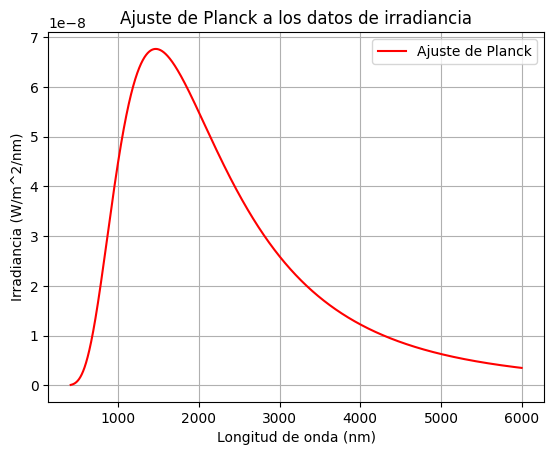

1978.7609692387268


In [18]:
import matplotlib.pyplot as plt



x = np.linspace(longitud_onda[mask].min(), 6000, 100000 )

plt.plot(x, planck(x, *popt), label='Ajuste de Planck',c='red')

plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Irradiancia (W/m^2/nm)')
plt.title('Ajuste de Planck a los datos de irradiancia')
plt.legend()
plt.grid()
plt.show()


temperatura = 1e9 * (0.0028976) / x[np.where( planck(x, *popt) == planck(x, *popt).max())[0][0]]
print(temperatura)